In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: xlabel='Height'>

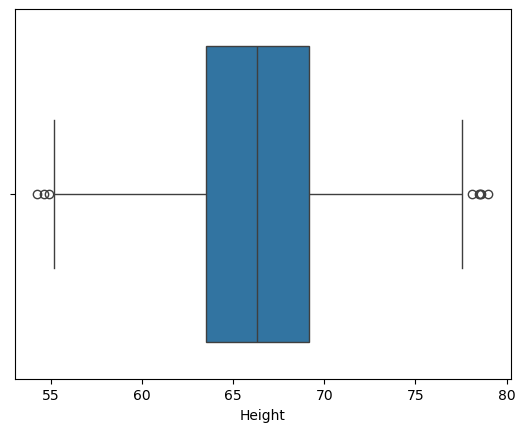

In [3]:
import seaborn as sns
sns.boxplot(x=df['Height'])

<Axes: xlabel='Weight'>

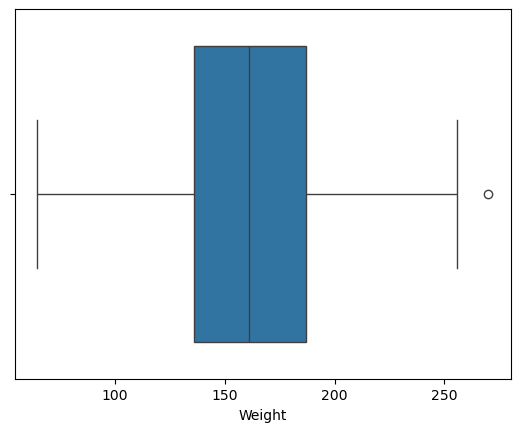

In [4]:
sns.boxplot(x= df['Weight'])

In [5]:
Height_max = df['Height'].quantile(0.99)
Height_min = df['Height'].quantile(0.01)
Height_max

74.7857900583366

In [9]:
#just to compare
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [6]:
# trimming:
new_df = df[(df['Height']<Height_max) & (df['Height']> Height_min)]
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

In [12]:
# Capping (Winsorization):
import numpy as np
new_df_cap = df.copy()
new_df_cap['Height'] = np.where(
    df['Height']> Height_max,
    Height_max,
    np.where(
        df['Height']< Height_min,
        Height_min,
        df['Height']
    )
)
new_df_cap['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

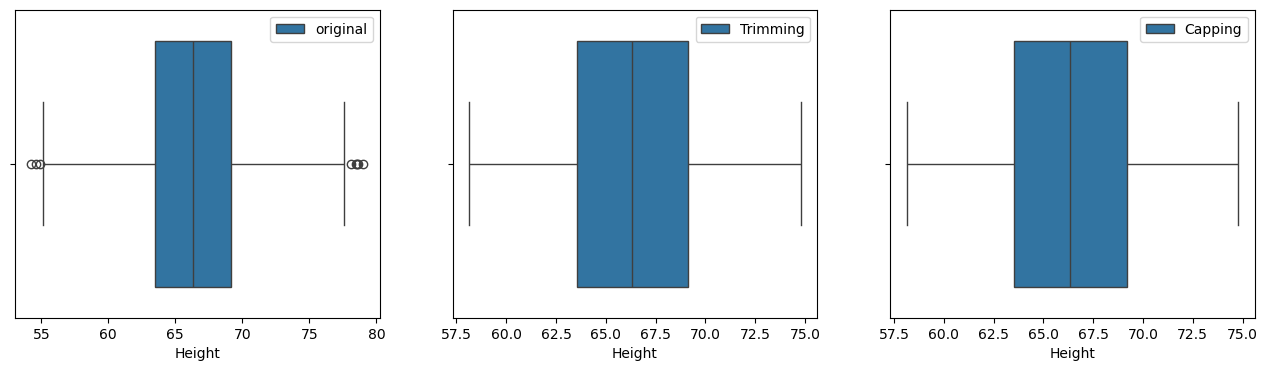

In [14]:
# Compare:
plt.figure(figsize= (16,4))
plt.subplot(131)
sns.boxplot(x = df['Height'], label = 'original')

plt.subplot(132)
sns.boxplot(x = new_df['Height'], label = 'Trimming')

plt.subplot(133)
sns.boxplot(x = new_df_cap['Height'], label = 'Capping')
plt.legend()